In [1]:
# 소스코드 폴더상의 data 폴더에서 train.csv 불러오기 

import pandas as pd 
df = pd.read_csv('../data/train.csv')

In [5]:
# -------------------------------------
# image path 
df

,id,img_path,label,len
0,TRAIN_00000,../data/train/TRAIN_00000.png,빨간색,3
1,TRAIN_00001,../data/train/TRAIN_00001.png,머,1
2,TRAIN_00002,../data/train/TRAIN_00002.png,차차,2
3,TRAIN_00003,../data/train/TRAIN_00003.png,써,1
4,TRAIN_00004,../data/train/TRAIN_00004.png,놓치다,3
...,...,...,...,...
76883,TRAIN_76883,../data/train/TRAIN_76883.png,회,1
76884,TRAIN_76884,../data/train/TRAIN_76884.png,겪다,2
76885,TRAIN_76885,../data/train/TRAIN_76885.png,벨트,2
76886,TRAIN_76886,../data/train/TRAIN_76886.png,톼,1


In [3]:
# 불러온 csv 에서 이미지 파일 경로수정 
bl_row = []
for i,row in df.iterrows():
    path = row['img_path']
    p1 = path.replace("./train/","../data/train/")
    bl_row.append(p1)
df['img_path'] = bl_row
df

,id,img_path,label
0,TRAIN_00000,../data/train/TRAIN_00000.png,빨간색
1,TRAIN_00001,../data/train/TRAIN_00001.png,머
2,TRAIN_00002,../data/train/TRAIN_00002.png,차차
3,TRAIN_00003,../data/train/TRAIN_00003.png,써
4,TRAIN_00004,../data/train/TRAIN_00004.png,놓치다
...,...,...,...
76883,TRAIN_76883,../data/train/TRAIN_76883.png,회
76884,TRAIN_76884,../data/train/TRAIN_76884.png,겪다
76885,TRAIN_76885,../data/train/TRAIN_76885.png,벨트
76886,TRAIN_76886,../data/train/TRAIN_76886.png,톼


In [6]:
# 제공된 학습데이터 중 1글자 샘플들의 단어사전이 학습/테스트 데이터의 모든 글자를 담고 있으므로 학습 데이터로 우선 배치
df['len'] = df['label'].str.len()
train_v1 = df[df['len']==1]

qw=[sum(df['len']==i) for i in range(1,7)]
for k in range(1,7):
    print(k,"개 단어 갯수 : ",qw[k-1])

1 개 단어 갯수 :  23703
2 개 단어 갯수 :  28631
3 개 단어 갯수 :  13514
4 개 단어 갯수 :  9988
5 개 단어 갯수 :  1026
6 개 단어 갯수 :  26


In [7]:
# Data Augmentation  
# 2 길이 label 과 3 길이 label 을 합쳐서 5길이 label 생성 

word_bl = []
ZX = {"2":[],"2_path":[],"2_label":[] ,"3":[],"3_path":[],"3_label":[]}
for i,row in df.iterrows():

    id = row['id']
    path = row['img_path']
    label = row['label']
    _len =len(row['label'])
    
    if str(_len) in ZX.keys():
        ZX[str(_len)].append(id)
        
        if str(_len) =="2":
            ZX["2_path"].append(path)
            ZX["2_label"].append(label)
        elif str(_len) =="3":
            ZX["3_path"].append(path)
            ZX["3_label"].append(label)

In [8]:
print(len(ZX['2']))
print(len(ZX['2_path']))
print(len(ZX['2_label']))
print(len(ZX['3']))
print(len(ZX['3_path']))
print(len(ZX['3_label']))

28631
28631
28631
13514
13514
13514


(64, 190, 3)
2 :  차차
3 :  빨간색


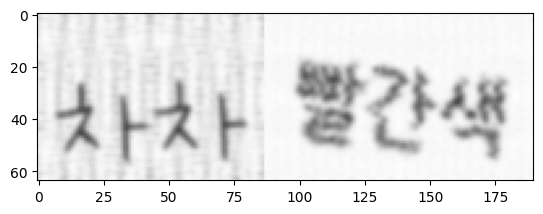

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 합쳐진 데이터셋 검증 

r2 = plt.imread(ZX['2_path'][0])
r3 = plt.imread(ZX['3_path'][0])

m_r = np.concatenate((r2,r3),axis=1)
plt.imshow(m_r)
print(m_r.shape)
print("2 : ", ZX['2_label'][0])
print("3 : ", ZX['3_label'][0])

In [12]:
# 2길이 단어와 3길이 단어의 랜덤생성을 위한 변수 생성
rand_2 = np.random.randint(0,28631)
rand_3 = np.random.randint(0,13514)

In [14]:
# 조합된 5길이 단어들을 저장 

from PIL import Image
r2b =[]
r3b =[]

new_label_5 = []
new_img_5= []
new_img_ids=[]
new_path_5 =[]

breakcnt = 0
for q in range(0,10000):
    rand_2 = np.random.randint(0,28631)
    rand_3 = np.random.randint(0,13514)
    a = rand_2
    b = rand_3
    
    if rand_2 not in r2b and rand_3 not in r3b:
        r2b.append(a)
        r3b.append(b)
    
        image2 = Image.open(ZX['2_path'][a]).convert('RGB')
        image3 = Image.open(ZX['3_path'][b]).convert('RGB')
        
        m_r = np.concatenate((image2,image3),axis=1)
        new_img_5.append(m_r)

        new_img_ids.append(f"new_{a}_{b}")
        new_label_5.append(ZX['2_label'][a] + ZX['3_label'][b])
        new_path_5.append(f"../data/train_v1/{a}_{b}.png")


        #breakcnt+=1
        #if breakcnt == 3:
        #    break
        plt.imsave(f"../data/train_v1/{a}_{b}.png",m_r)      
    

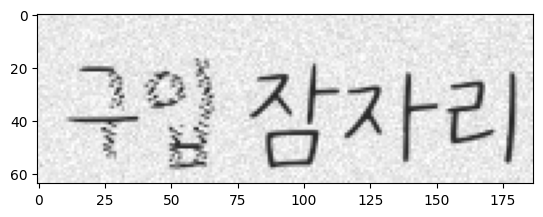

In [15]:
plt.imshow(new_img_5[0])

In [16]:
new_label_5[0]

'구입잠자리'

In [17]:
new_path_5[0]

'../data/train_v1/11654_1061.png'

In [18]:
new_img_ids[0]

'new_11654_1061'

In [19]:
len(new_img_ids),len(new_img_5),len(new_label_5)

(6438, 6438, 6438)

In [20]:
# 5길이 단어들을 데이터 프레임 형태로 변환 
D_5 = {'id':new_img_ids,'img_path':new_path_5,'label':new_label_5,'len':[5 for i in range(len(new_img_ids))]}
df5 = pd.DataFrame(D_5)

In [21]:
df

,id,img_path,label,len
0,TRAIN_00000,../data/train/TRAIN_00000.png,빨간색,3
1,TRAIN_00001,../data/train/TRAIN_00001.png,머,1
2,TRAIN_00002,../data/train/TRAIN_00002.png,차차,2
3,TRAIN_00003,../data/train/TRAIN_00003.png,써,1
4,TRAIN_00004,../data/train/TRAIN_00004.png,놓치다,3
...,...,...,...,...
76883,TRAIN_76883,../data/train/TRAIN_76883.png,회,1
76884,TRAIN_76884,../data/train/TRAIN_76884.png,겪다,2
76885,TRAIN_76885,../data/train/TRAIN_76885.png,벨트,2
76886,TRAIN_76886,../data/train/TRAIN_76886.png,톼,1


In [22]:
merged_df = pd.concat([df,df5])
merged_df = merged_df.reset_index(drop=True)

In [23]:
# 5길이 단어들을 데이터 프레임 형태로 저장  

merged_df.tail()
merged_df.to_csv("../data/train_label_5.csv")

In [24]:
# 길이 6 작업  

In [25]:
# 4,2 길이의 단어들을 조합 

word_bl = []
ZX = {"4":[],"4_path":[],"4_label":[] ,"2":[],"2_path":[],"2_label":[]}
for i,row in df.iterrows():

    id = row['id']
    path = row['img_path']
    label = row['label']
    _len =len(row['label'])
    
    if str(_len) in ZX.keys():
        ZX[str(_len)].append(id)
        
        if str(_len) =="4":
            ZX["4_path"].append(path)
            ZX["4_label"].append(label)
        elif str(_len) =="2":
            ZX["2_path"].append(path)
            ZX["2_label"].append(label)

In [26]:
print(len(ZX['4']))
print(len(ZX['4_path']))
print(len(ZX['4_label']))
print(len(ZX['2']))
print(len(ZX['2_path']))
print(len(ZX['2_label']))

9988
9988
9988
28631
28631
28631


(64, 260, 3)
4 :  오래도록
2 :  차차


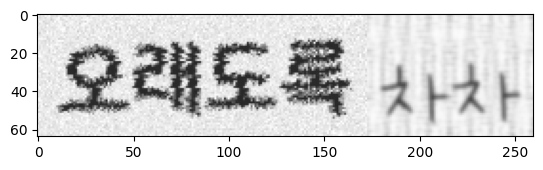

In [27]:
r4 = plt.imread(ZX['4_path'][0])
r2 = plt.imread(ZX['2_path'][0])

m_r = np.concatenate((r4,r2),axis=1)
plt.imshow(m_r)
print(m_r.shape)
print("4 : ", ZX['4_label'][0])
print("2 : ", ZX['2_label'][0])

In [28]:
# 조합난수 생성 
rand_4 = np.random.randint(0,9988)
rand_2 = np.random.randint(0,28631)

In [30]:
# 조합 실행 
r4b =[]
r2b =[]

new_label_6 = []
new_img_6= []
new_img_ids=[]
new_path_6 =[]

breakcnt = 0
for q in range(0,10000):
    rand_4 = np.random.randint(0,9981)
    rand_2 = np.random.randint(0,28631)
    a = rand_4
    b = rand_2
    
    if rand_4 not in r4b and rand_2 not in r2b:
        r4b.append(a)
        r2b.append(b)
    
        image4 = Image.open(ZX['4_path'][a]).convert('RGB')
        image2 = Image.open(ZX['2_path'][b]).convert('RGB')
        
        m_r = np.concatenate((image4,image2),axis=1)
        new_img_6.append(m_r)

        new_img_ids.append(f"new_{a}_{b}")
        new_label_6.append(ZX['4_label'][a] + ZX['2_label'][b])
        new_path_6.append(f"../data/train_v1/{a}_{b}.png")


        #breakcnt+=1
        #if breakcnt == 3:
        #    break
        plt.imsave(f"../data/train_v1/{a}_{b}.png",m_r)      
    

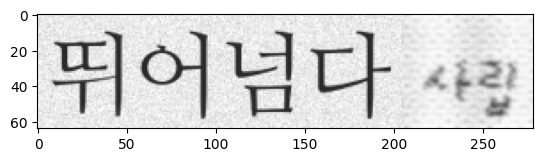

In [31]:
plt.imshow(new_img_6[0])

In [32]:
new_label_6[0]

'뛰어넘다사립'

In [33]:
new_path_6[0]

'../data/train_v1/5116_26381.png'

In [34]:
new_img_ids[0]

'new_5116_26381'

In [35]:
len(new_img_ids),len(new_img_6),len(new_label_6)

(5866, 5866, 5866)

In [36]:
# 6길이 dataframe 생성 
D_6 = {'id':new_img_ids,'img_path':new_path_6,'label':new_label_6,'len':[6 for i in range(len(new_img_ids))]}
df6 = pd.DataFrame(D_6)

In [37]:
# 5길이 dataframe 불러오기 
df = pd.read_csv("../data/train_label_5.csv")
del df['Unnamed: 0']

In [38]:
df

,id,img_path,label,len
0,TRAIN_00000,../data/train/TRAIN_00000.png,빨간색,3
1,TRAIN_00001,../data/train/TRAIN_00001.png,머,1
2,TRAIN_00002,../data/train/TRAIN_00002.png,차차,2
3,TRAIN_00003,../data/train/TRAIN_00003.png,써,1
4,TRAIN_00004,../data/train/TRAIN_00004.png,놓치다,3
...,...,...,...,...
83321,new_19479_9295,../data/train_v1/19479_9295.png,보조소유자,5
83322,new_20156_8591,../data/train_v1/20156_8591.png,연구맡기다,5
83323,new_26433_12441,../data/train_v1/26433_12441.png,점검빼놓다,5
83324,new_21024_6192,../data/train_v1/21024_6192.png,단점발바닥,5


In [39]:
# merge 5,6 길이 dataframe 
merged_df = pd.concat([df,df6])
merged_df = merged_df.reset_index(drop=True)
merged_df.tail()

,id,img_path,label,len
89187,new_2146_12064,../data/train_v1/2146_12064.png,특이하다의심,6
89188,new_3217_19868,../data/train_v1/3217_19868.png,잘못되다상업,6
89189,new_5389_16955,../data/train_v1/5389_16955.png,인간관계기업,6
89190,new_2434_10694,../data/train_v1/2434_10694.png,생활수준지폐,6
89191,new_1356_3886,../data/train_v1/1356_3886.png,가리키다가구,6


In [40]:
merged_df.to_csv("../data/train_label_6.csv")